In [1]:
from Bio import Entrez, SeqIO
from Bio.Seq import Seq
from collections import Counter
import sympy as sp
import math
import random

In [2]:
# Set email for Entrez (required for NCBI access; use a placeholder or your own)
Entrez.email = "tusk.pwt.life"  # Replace with a real email to avoid NCBI blocks

In [3]:
# Function to fetch a gene sequence from NCBI
def fetch_gene_sequence(accession, start=1, end=None):
    handle = Entrez.efetch(db="nucleotide", id=accession, rettype="fasta", retmode="text", seq_start=start, seq_stop=end)
    record = SeqIO.read(handle, "fasta")
    handle.close()
    return record.seq

In [4]:
# Expanded PWT-inspired DNA prime analyzer
def analyze_dna_primes(dna_seq):
    # Translate to protein for context
    protein = dna_seq.translate()
    print(f"Protein sequence (first 50 aa): {str(protein)[:50]}...")

    # Extract codons (handle if not multiple of 3)
    codons = [str(dna_seq[i:i+3]) for i in range(0, len(dna_seq), 3) if len(dna_seq[i:i+3]) == 3]

    # Count codons
    codon_count = Counter(codons)

    # Analyze counts for prime signatures
    prime_data = []
    for codon, count in codon_count.items():
        factors = sp.factorint(count)
        is_prime_count = sp.isprime(count)
        prime_data.append((codon, count, is_prime_count, factors))

    # Totals
    total_codons = len(codons)
    total_length = len(dna_seq)
    total_factors = sp.factorint(total_codons)
    length_factors = sp.factorint(total_length)

    return prime_data, total_codons, total_factors, total_length, length_factors

In [5]:
# Simulate evolutionary drifts (simple SNP mutations over generations)
def simulate_evo_drifts(dna_seq, generations=5, mutation_rate=0.01):
    results = []
    current_seq = dna_seq
    for gen in range(generations):
        # Mutate: Random SNP at rate
        seq_list = list(current_seq)
        for i in range(len(seq_list)):
            if random.random() < mutation_rate:
                bases = ['A', 'C', 'G', 'T']
                seq_list[i] = random.choice([b for b in bases if b != seq_list[i]])
        current_seq = Seq(''.join(seq_list))
        
        # Analyze
        prime_data, total_codons, total_factors, total_length, length_factors = analyze_dna_primes(current_seq)
        
        # Summarize drift (e.g., number of prime counts)
        num_prime_counts = sum(1 for _, _, is_prime, _ in prime_data if is_prime)
        results.append((gen + 1, num_prime_counts, total_factors))
    
    return results

## Test the Functions

Fetch the HBB gene segment and analyze it. Then simulate drifts. Customize as needed!

In [6]:
# Set your email (required for NCBI)
Entrez.email = "tusk@pwt.life"  # Use your real email

# Fetch and analyze
print("Fetching HBB gene segment from NCBI...")
hbb_seq = fetch_gene_sequence("NG_028289.1", start=5001, end=7000)
print(f"Fetched sequence length: {len(hbb_seq)} bp")

prime_data, total_codons, total_factors, total_length, length_factors = analyze_dna_primes(hbb_seq)
print("Sample Prime Data (first 5):")
for data in prime_data[:5]:
    print(data)
print(f"Total Codons: {total_codons}, Factors: {total_factors}")
print(f"DNA Length: {total_length}, Factors: {length_factors}")

Fetching HBB gene segment from NCBI...
Fetched sequence length: 2000 bp
Protein sequence (first 50 aa): RAPGRAGGRAAGGRAAIGRPSERATPAQRGDPSPSRRGAGAGAERISAPS...
Sample Prime Data (first 5):
('CGG', 33, False, {3: 1, 11: 1})
('GCG', 32, False, {2: 5})
('CCG', 26, False, {2: 1, 13: 1})
('GGG', 48, False, {2: 4, 3: 1})
('AGA', 3, True, {3: 1})
Total Codons: 666, Factors: {2: 1, 3: 2, 37: 1}
DNA Length: 2000, Factors: {2: 4, 5: 3}


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/Bio/Seq.py:2879: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [7]:
# Simulate drifts on the fetched sequence
print("\nSimulating Evolutionary Prime Drifts (5 generations):")
evo_results = simulate_evo_drifts(hbb_seq, generations=5, mutation_rate=0.01)
for gen, prime_counts, factors in evo_results:
    print(f"Generation {gen}: Prime Counts = {prime_counts}, Total Codon Factors = {factors}")


Simulating Evolutionary Prime Drifts (5 generations):
Protein sequence (first 50 aa): RAPGRAGGRAAGGRAAIGRPSERATPAQRGDPSPSRRGAGAGAERISAPS...
Protein sequence (first 50 aa): RAPGRAGGRAAGGRAAIGRPSERATPAQRGDPSHSRRGAGAGTYRISAPS...
Protein sequence (first 50 aa): RAPGRAGGRAAGGRAAIGRPSERATPAQRGDPSHCRRGAGAGTYRISAPS...
Protein sequence (first 50 aa): RAPGRAGGRAAGGRAAIGRPSERATPAQRGDPSHCRRGAGAGTYRISAPS...
Protein sequence (first 50 aa): RAPGRACGRAAGGRAAIGRPSERATPAQRGDPSHCRRGAGAGTYRISAPS...
Generation 1: Prime Counts = 29, Total Codon Factors = {2: 1, 3: 2, 37: 1}
Generation 2: Prime Counts = 29, Total Codon Factors = {2: 1, 3: 2, 37: 1}
Generation 3: Prime Counts = 25, Total Codon Factors = {2: 1, 3: 2, 37: 1}
Generation 4: Prime Counts = 29, Total Codon Factors = {2: 1, 3: 2, 37: 1}
Generation 5: Prime Counts = 24, Total Codon Factors = {2: 1, 3: 2, 37: 1}


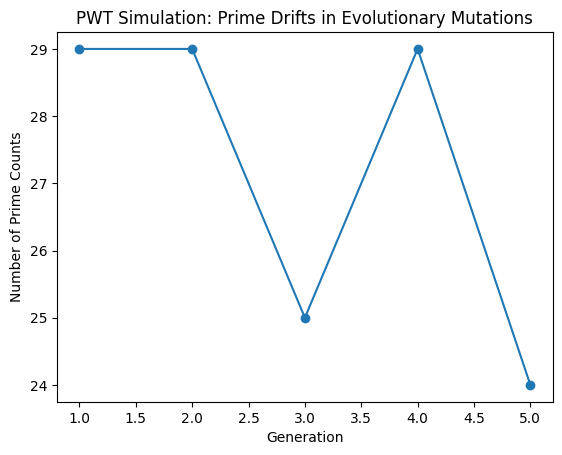

In [8]:
import matplotlib.pyplot as plt
generations = [r[0] for r in evo_results]
prime_counts = [r[1] for r in evo_results]
plt.plot(generations, prime_counts, marker='o')
plt.xlabel('Generation')
plt.ylabel('Number of Prime Counts')
plt.title('PWT Simulation: Prime Drifts in Evolutionary Mutations')
plt.show()